In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [4]:
df = pd.read_csv(r"C:\Users\Usuario\Documents\Ironhack\Week5\Day1\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")

In [5]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
# --- 1. Frequency Tables: ---

# Generate a frequency table for the product category.
category_counts = df['category'].value_counts()

In [10]:
category_counts

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [8]:
# Which are the top 5 most listed product categories?
top_5_categories = category_counts.head(5)

In [9]:
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [15]:
# 2. visualizations:

top_n = 10 
top_n_categories = category_counts.head(top_n)

plot_df = top_n_categories.reset_index()
plot_df.columns = ['Category', 'Count']

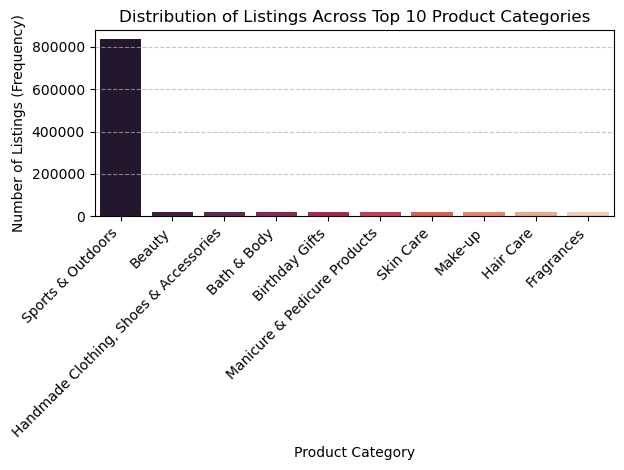

In [16]:
# Barchart

sns.barplot(
    data=plot_df, 
    x='Category', 
    y='Count', 
    hue='Category', 
    palette="rocket",
    legend=False)

plt.title(f'Distribution of Listings Across Top {top_n} Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings (Frequency)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

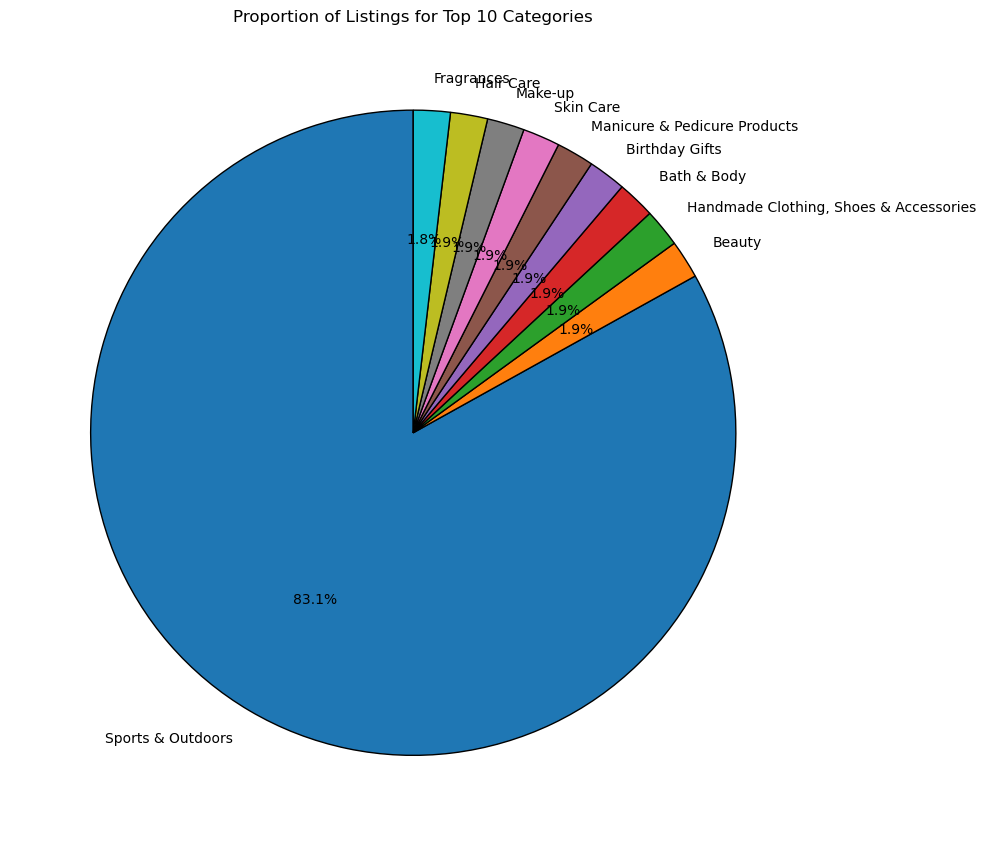

In [17]:
# Piechart

plt.figure(figsize=(10, 10))

plt.pie(
    top_n_categories.values,
    labels=top_n_categories.index,
    autopct='%1.1f%%', 
    startangle=90,     
    wedgeprops={'edgecolor': 'black'}
)

plt.title(f'Proportion of Listings for Top {top_n} Categories')
plt.tight_layout()
plt.show() 
#

In [23]:
# --- Part 2: Delving into Product Pricing --- 

# 1. Measures of Centrality:
# Calculate the mean, median, and mode for the price of products.

price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

print(f" Price mean is {price_mean}")
print(f" Price median is {price_median}")
print(f" Price mode is {price_mode}")

# What's the average price point of products listed? How does this compare with the most common price point (mode)?

print(f"The average price {price_mean:.2f}, significantly higher than the most common price {price_mode}.")


 Price mean is 89.24380943923661
 Price median is 19.09
 Price mode is 9.99
The average price 89.24, significantly higher than the most common price 9.99.


In [26]:
# 2. Measures of Dispersion:

# Determine the variance, standard deviation, range, and interquartile range for product price.

price_var = df['price'].var()
price_std = df['price'].std()
price_min = df['price'].min()
price_max = df['price'].max()

print(f"Variance: {price_var:,.2f}")
print(f"Standard Deviation: {price_std:,.2f}")
print(f"Minimum Price: {price_min:,.2f}")
print(f"Maximum Price: {price_max:,.2f}")


# Quartiles for Interquartile and Range

price_q1 = df['price'].quantile(0.25)
price_q3 = df['price'].quantile(0.75)
price_range = price_max - price_min
price_iqr = price_q3 - price_q1


print(f"Interquartile Range: {price_iqr:,.2f}")
print(f"Range (Max - Min): {price_range:,.2f}")

print("How varied are the product prices? Are there any indicators of a significant spread in prices?")


print(f"The std {price_std} and range {price_range} show the prices are highly varied")
print(f"The std {price_std} and a small IQR {price_iqr} confirm a significant spread due to expensive outliers")

Variance: 119,445.49
Standard Deviation: 345.61
Minimum Price: 0.00
Maximum Price: 100,000.00
Interquartile Range: 36.00
Range (Max - Min): 100,000.00
How varied are the product prices? Are there any indicators of a significant spread in prices?
The std 345.60886175352226 and range 100000.0 show the prices are highly varied
The std 345.60886175352226 and a small IQR 36.0 confirm a significant spread due to expensive outliers


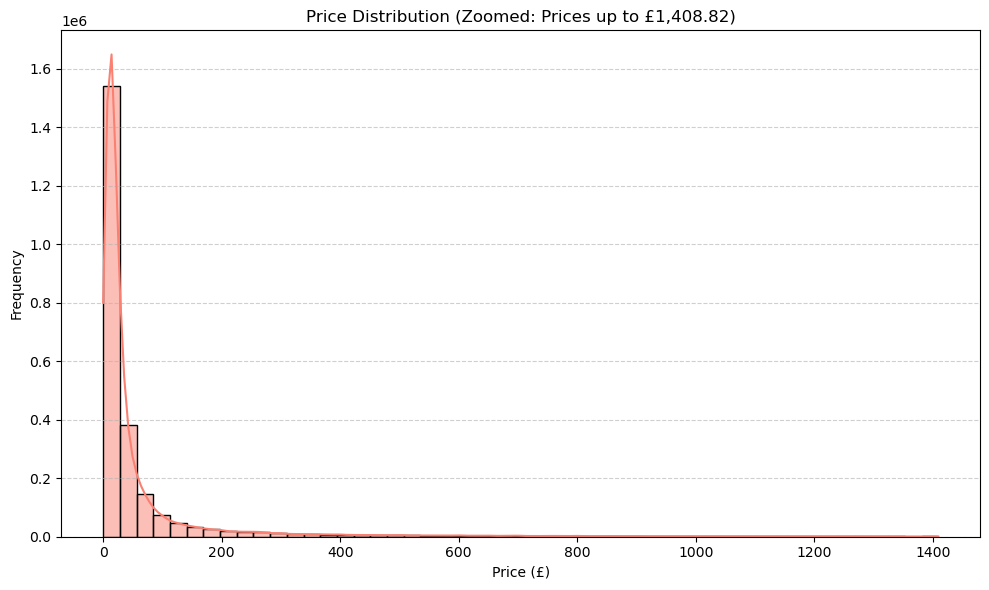

In [29]:
# Visualizations:

# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..


price_limit = df['price'].quantile(0.99)
if price_limit < 100: 
    price_limit = 100 

plt.figure(figsize=(10, 6))
# Filter the data to the calculated limit for a clear visualization
sns.histplot(df[df['price'] <= price_limit]['price'], bins=50, kde=True, color='salmon')
plt.title(f'Price Distribution (Zoomed: Prices up to £{price_limit:,.2f})')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()





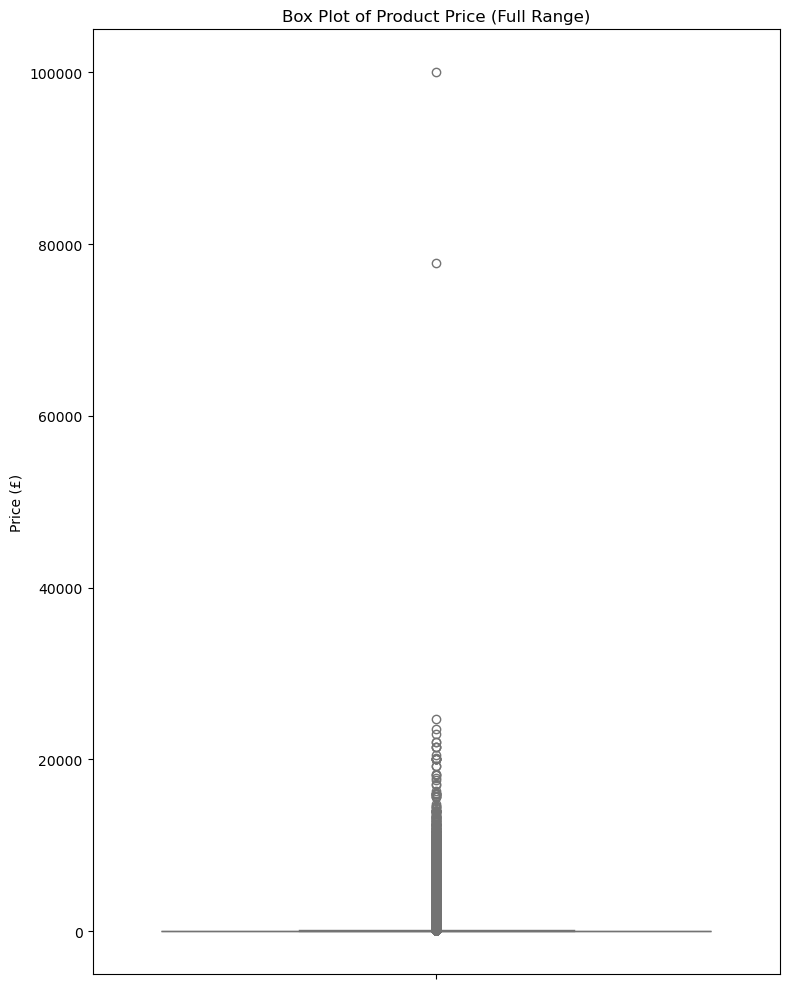

In [30]:
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.abs

plt.figure(figsize=(8, 10))
sns.boxplot(y=df['price'], color='lightgreen')
plt.title('Box Plot of Product Price (Full Range)')
plt.ylabel('Price (£)')
plt.tight_layout()
plt.show()

In [36]:
# --- Part 3: Unpacking Product Ratings ---

# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# 1 . Measures of Centrality:

# Calculate the mean, median, and mode for the rating of products.

stars_mean = df['stars'].mean()
stars_median = df['stars'].median()
stars_mode = df['stars'].mode()[0]

print(f"Mean Rating: {stars_mean:.2f}")
print(f"Median Rating: {stars_median:.2f}")
print(f"Mode Rating: {stars_mode:.2f}")

# How do customers generally rate products? Is there a common trend?



Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00


In [37]:
# 2. Measures of Dispersion:

# Determine the variance, standard deviation, and interquartile range for product rating.

stars_var = df['stars'].var()
stars_std = df['stars'].std()
stars_min = df['stars'].min()
stars_max = df['stars'].max()

print(f"Variance: {stars_var:,.2f}")
print(f"Standard Deviation: {stars_std:,.2f}")
print(f"Minimum Price: {stars_min:,.2f}")
print(f"Maximum Price: {stars_max:,.2f}")


# Are the ratings consistent, or is there a wide variation in customer feedback?



Variance: 4.82
Standard Deviation: 2.19
Minimum Price: 0.00
Maximum Price: 5.00


In [28]:
# 3. Shape of the Distribution:

# Calculate the skewness and kurtosis for the rating column.

stars_skewness = df['stars'].skew()
stars_kurtosis = df['stars'].kurt()

print(f"Skewness: {stars_skewness:.4f}")
print(f"Kurtosis: {stars_kurtosis:.4f}")

print("Are the ratings normally distributed, or do they lean towards higher or lower values?")

print(f"The ratings do not significantly lean towards either higher or lower values")



Skewness: 0.0812
Kurtosis: -1.9260
Are the ratings normally distributed, or do they lean towards higher or lower values?
The ratings do not significantly lean towards either higher or lower values
